In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.style.use('dark_background')

In [68]:
def data(sample, direction, var, type_, angle):
    directory = f"{sample}/output/Angle_Dependence_4p2K_pos_{direction}/{var}/{type_}/"
    if angle < 0:
        prefix = "m"
    else:
        prefix = ""
    for file in os.listdir(directory):
        if file.startswith(f"{prefix}{int(np.abs(angle))}_"):
            return pd.read_csv(os.path.join(directory, file), names=["x", "y"])
    return None

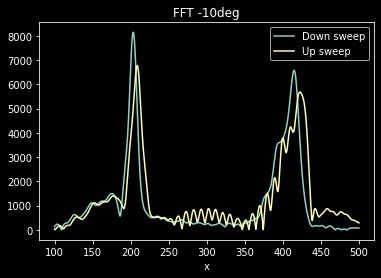

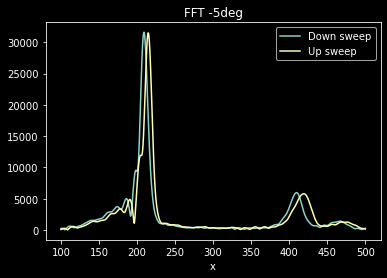

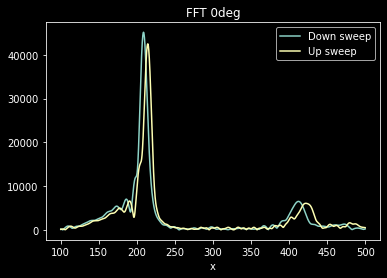

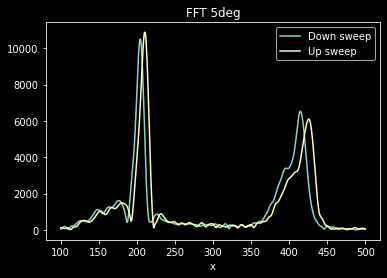

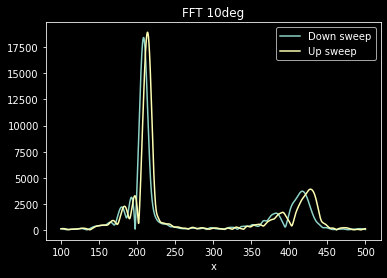

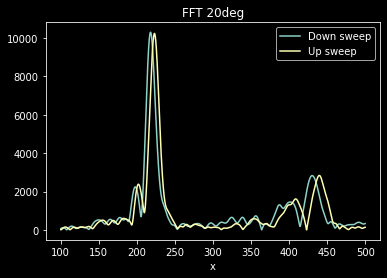

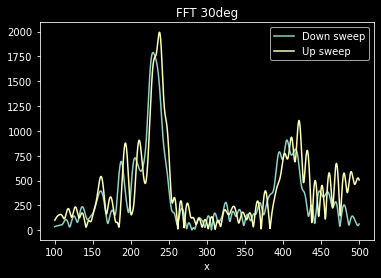

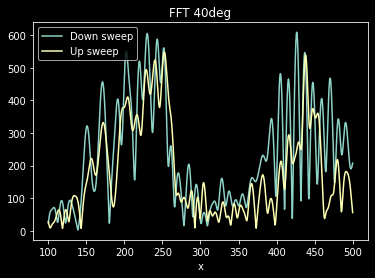

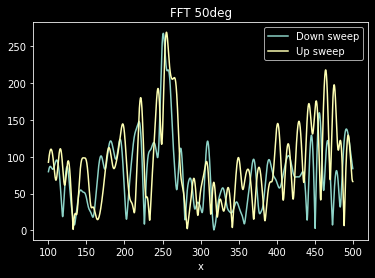

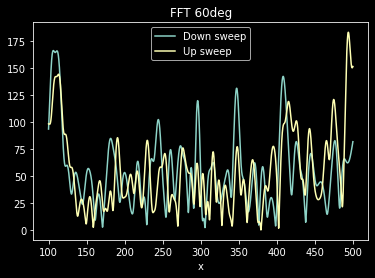

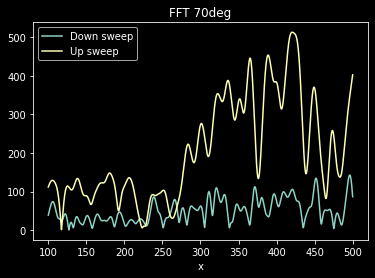

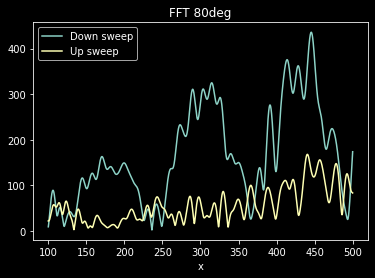

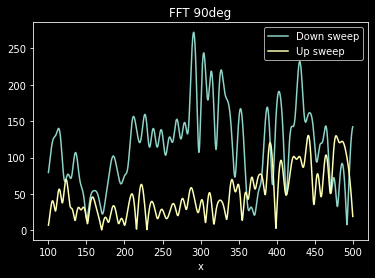

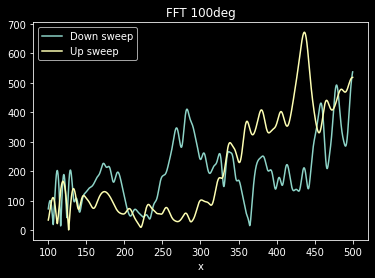

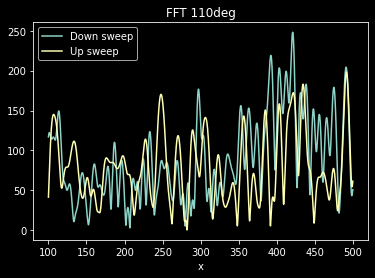

In [113]:
for angle in [-10,-5,0,5,10,20,30,40,50,60,70,80,90,100,110]:
    raw_down = data("Zr3_5584_nb_sc", "down", "Rxx68", "pre_interpolation", angle)
    raw_up = data("Zr3_5584_nb_sc", "up", "Rxx68", "pre_interpolation", angle)

    fft_down = data("Zr3_5584_nb_sc", "down", "Rxx68", "fft", angle)
    fft_up = data("Zr3_5584_nb_sc", "up", "Rxx68", "fft", angle)

    #raw_delta = (raw_up - raw_down).abs()

    ax = fft_down[fft_down.x.between(100, 500)].plot(x="x", y="y", title=f"FFT {angle}deg", label="Down sweep", kind="line")
    fft_up[fft_up.x.between(100, 500)].plot(ax=ax, x="x", y="y", label="Up sweep", kind="line")

    #ax = raw_down.plot(x="x", y="y", title="Raw data", label="Down sweep", kind="line")
    #raw_up.plot(ax=ax, x="x", y="y", label="Up sweep", kind="line")

    #raw_delta.plot(x="x", y="y", title="Difference in data", kind="line")